In [1]:
import numpy as np
import matplotlib.pyplot as plt
#load the dataset
from tensorflow.keras.datasets import mnist

(train_images_original, train_labels), (test_images_original, test_labels) = mnist.load_data()

In [2]:
#how many items do we have in the training set?
len(train_labels)

60000

In [3]:
#how many in the test set?
len(test_labels)

10000

In [4]:
#how is our input structured?
train_images_original.shape

(60000, 28, 28)

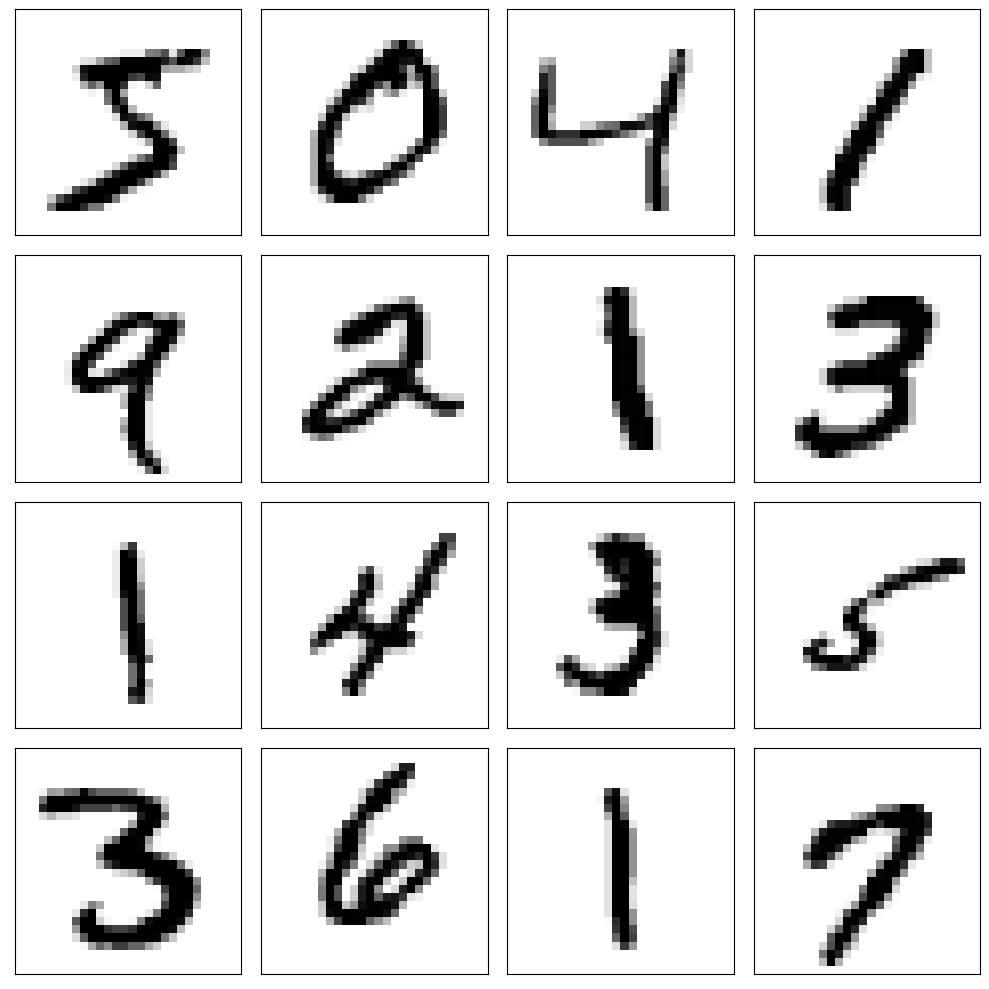

In [5]:
#60,000 images, each 28x28
#Let's take a look at a few of them. 

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(train_images_original[i],cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()


In [6]:
#We can render these as images
#But how are they actually stored in the data set?
train_images_original[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
#Let's train a model to recognize these handwritten digits! 

#First let's "flatten out" the square of pixels into one long vector (28*28=784)
train_images = train_images_original.reshape((60000, 28*28))
test_images = test_images_original.reshape((10000,28*28))

#Then rescale the pixel values to be between 0 and 1
#This is just to make training go a little easier and faster
train_images = train_images/255
test_images = test_images/255

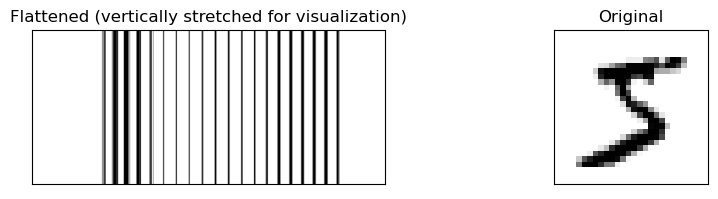

In [8]:
#Let's inspect the effect of flattening

plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.imshow(train_images[0].reshape(1,784),cmap=plt.cm.binary, aspect="auto")
plt.xticks([])
plt.yticks([])
plt.title("Flattened (vertically stretched for visualization)")

plt.subplot(1,2,2)
plt.imshow(train_images_original[0],cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title("Original")
plt.show()

In [9]:
#Let's build a model!
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,))

#build the model
x = layers.Dense(512, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)



Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2025-01-14 13:31:27.715772: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-14 13:31:27.715948: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
#compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
#fit the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2025-01-14 13:31:30.993180: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-01-14 13:31:31.173773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 5ms/step - loss: 0.2639 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1086 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0694 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0503 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0374 - accuracy: 0.9889


 67/313 [=====>........................] - ETA: 0s

2025-01-14 13:31:45.624415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


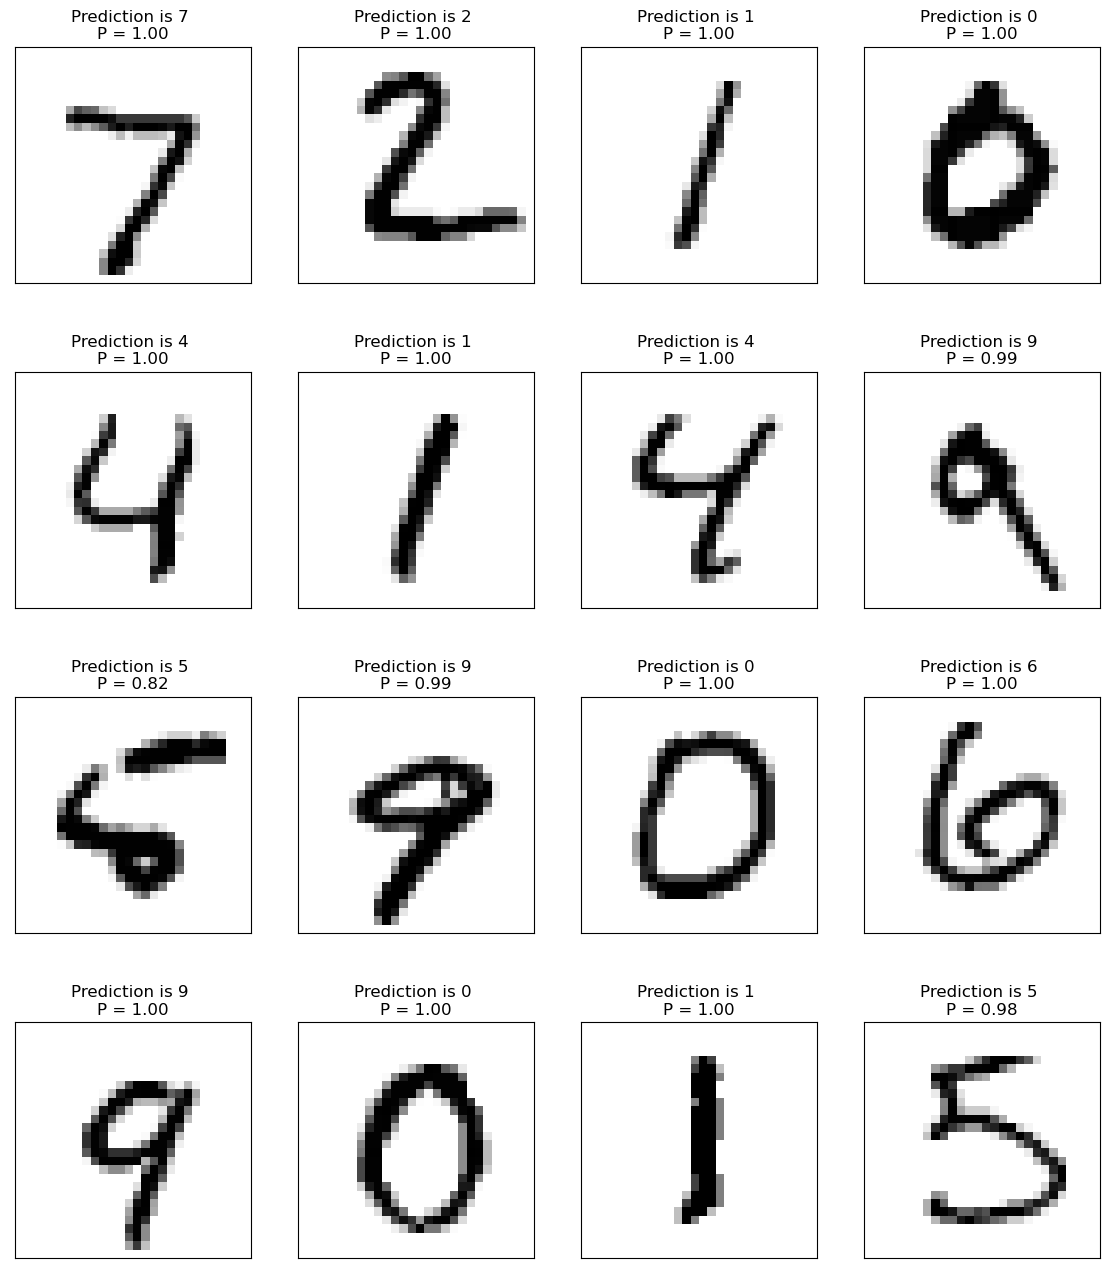

In [12]:
#Let's see how the model does on items it hasn't seen before!

predictions = model.predict(test_images)

plt.figure(figsize=(14,14))    
for i in range(16):
    plt.subplot(4,4,i+1)
    #print("prediction is " + str(predictions[i].argmax()))
    #print("correct label is " + str(test_labels[i]))
    plt.imshow(test_images_original[i],cmap=plt.cm.binary)
    plt.title(f"Prediction is {predictions[i].argmax()} \nP ={predictions[i].max(): .2f}")
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(top=1)
    
    

In [13]:
#Let's assess its accuracy on the whole test set
_, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy on test set is {test_accuracy: .4f}")

 23/313 [=>............................] - ETA: 1s - loss: 0.0586 - accuracy: 0.9823

2025-01-14 13:31:49.643120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0649 - accuracy: 0.9797
Accuracy on test set is  0.9797


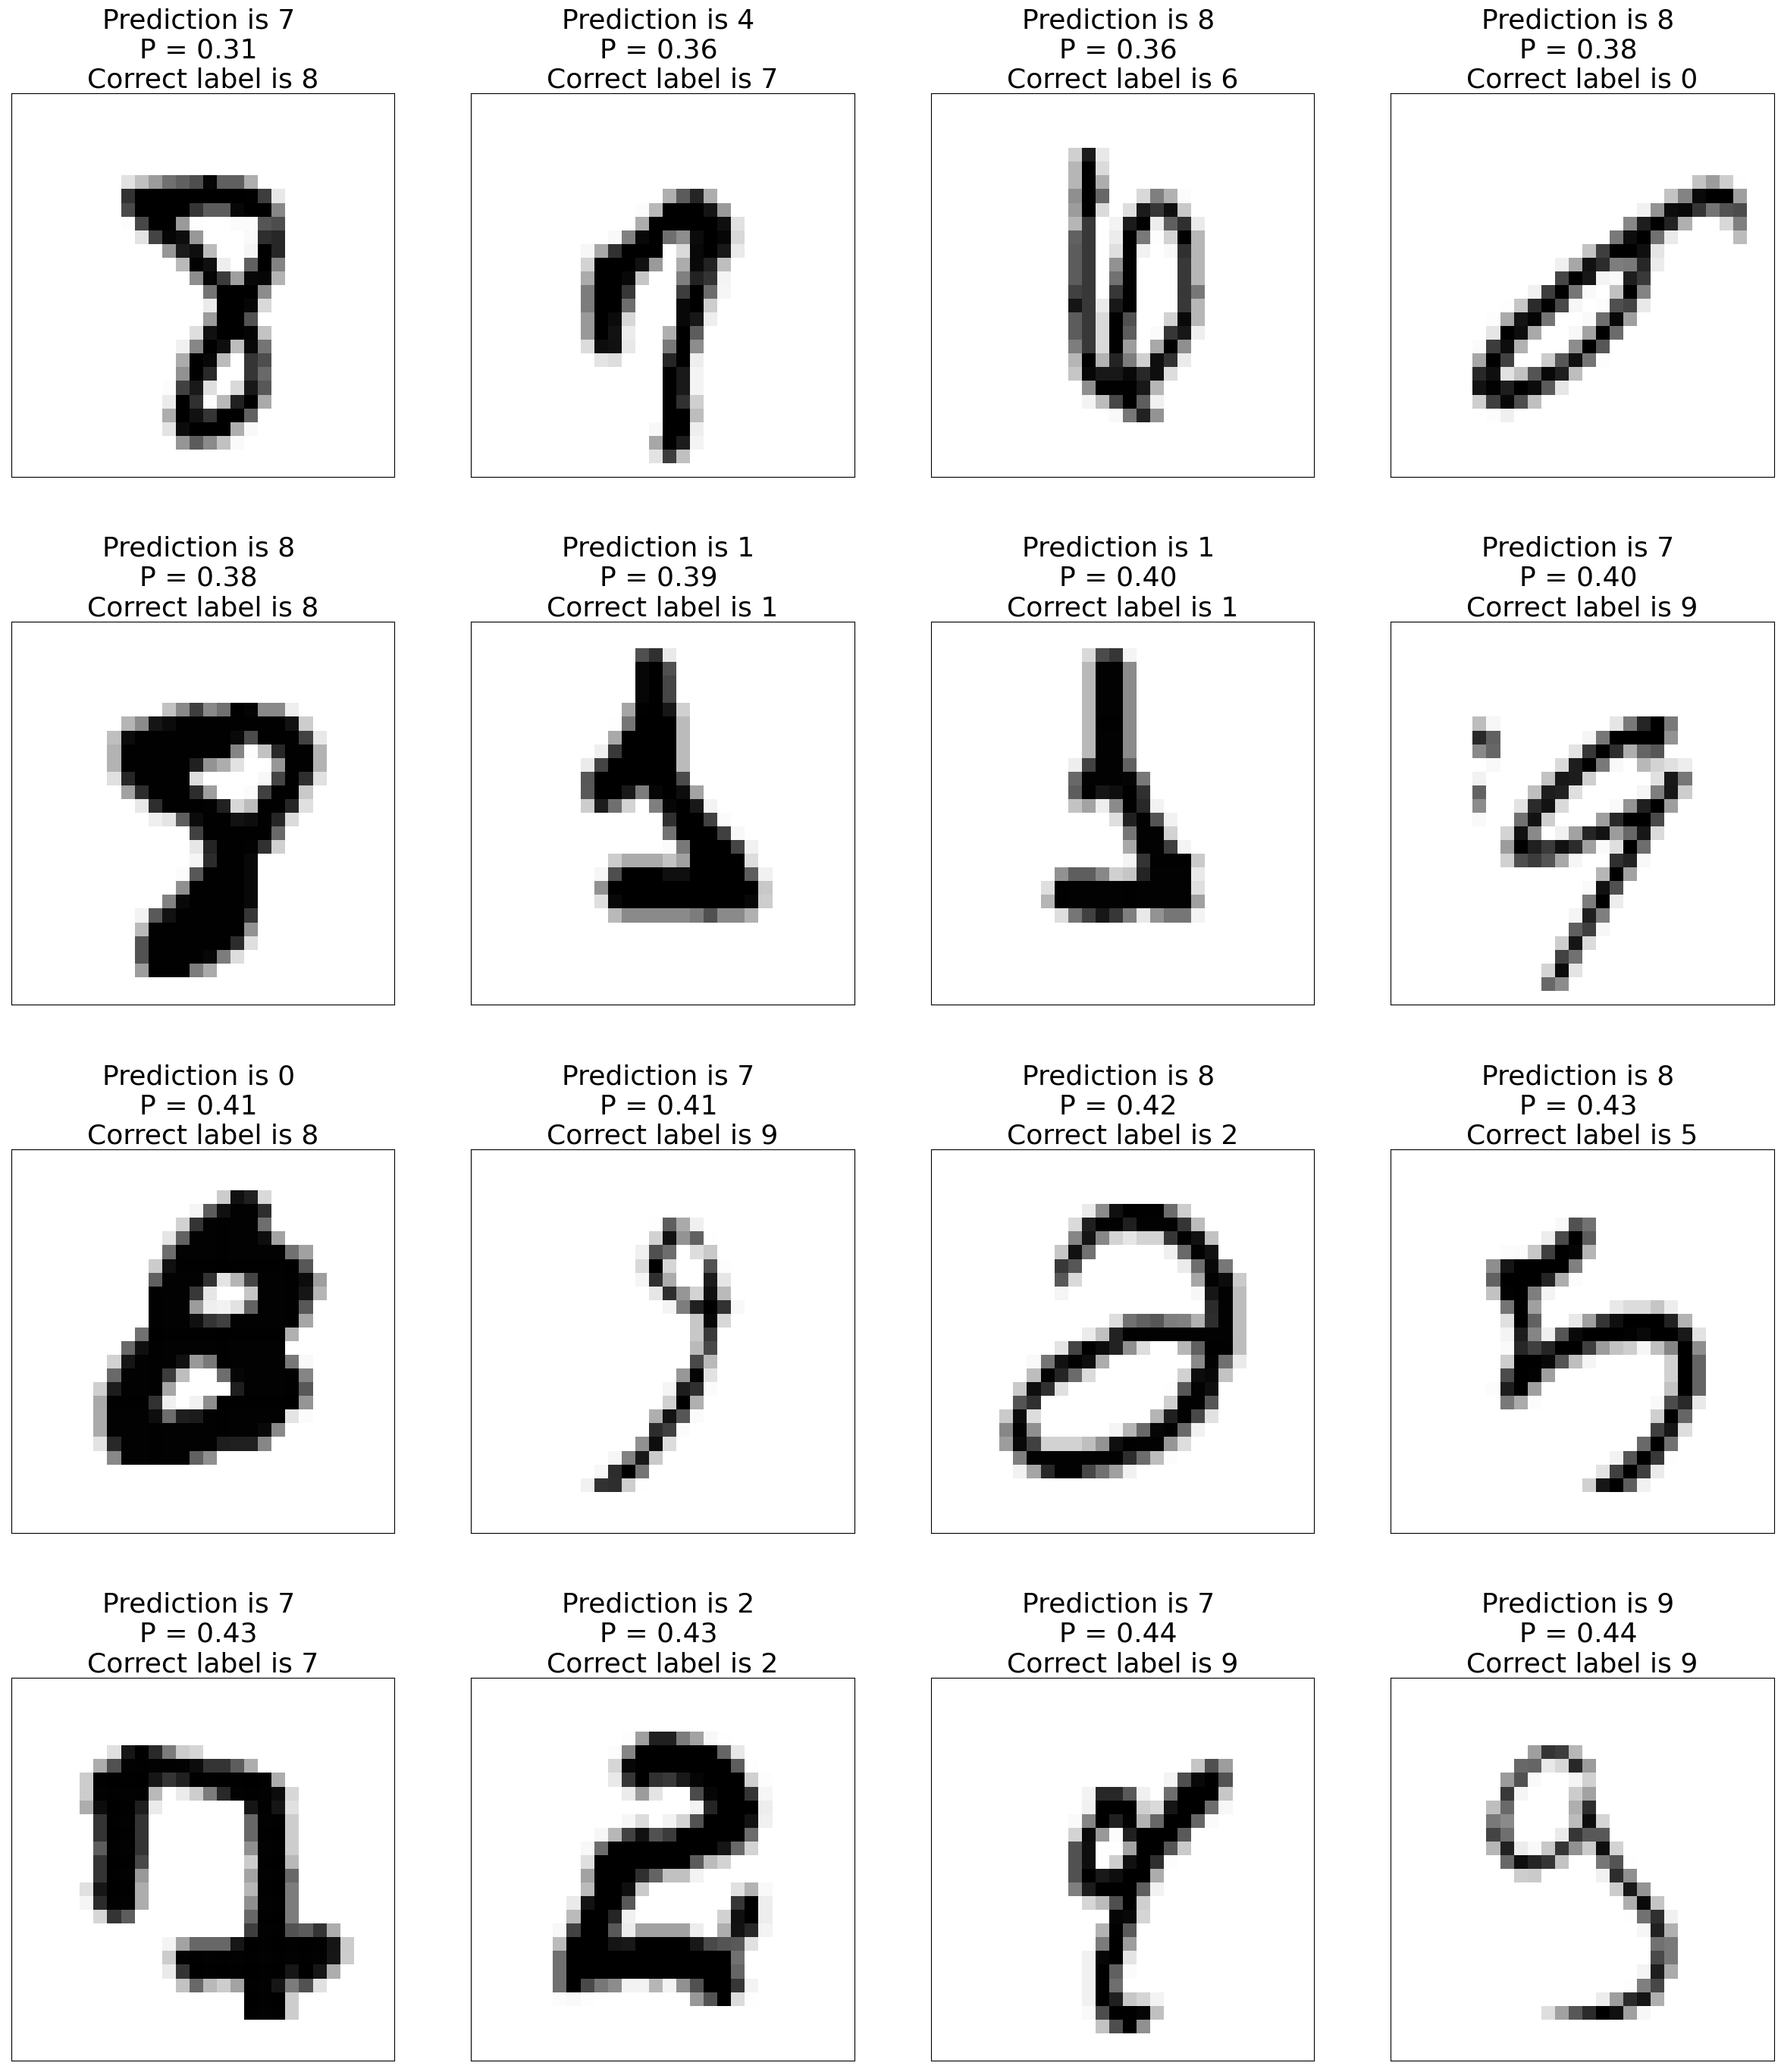

In [14]:
#Let's take a look at the images the model is least confident about

lowest_prob_indices = np.argsort(predictions.max(axis=1))

plt.figure(figsize=(30,30))    
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(test_images_original[lowest_prob_indices[i]],cmap=plt.cm.binary)
    plt.title(f"Prediction is {predictions[lowest_prob_indices[i]].argmax()} \nP ={predictions[lowest_prob_indices[i]].max(): .2f} \nCorrect label is {test_labels[lowest_prob_indices[i]]}", fontsize=26)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(top=1)
    
  